In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# from sklearn.neural_network import 
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

## CUT

In [3]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98


In [5]:
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# #store gap values
# Y_train = df_train.gap.values
# #row where testing examples start
# test_idx = df_train.shape[0]
# #delete 'Id' column
# df_test = df_test.drop(['Id'], axis=1)
# #delete 'gap' column
# df_train = df_train.drop(['gap'], axis=1)

In [22]:
# #DataFrame with all train and test examples so we can more easily apply feature engineering on
# df_all = pd.concat((df_train, df_test), axis=0)
# df_all.head()

In [23]:
# #Drop the 'smiles' column
# df_all = df_all.drop(['smiles'], axis=1)
# vals = df_all.values
# X_train = vals[:test_idx]
# X_test = vals[test_idx:]
# print "Train features:", X_train.shape
# print "Train gap:", Y_train.shape
# print "Test features:", X_test.shape

In [6]:
#df_train.head()
df_train_new = df_train.loc[:, (df_train != 0).any(axis=0)]
df_train_new

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.98
5,C1=Cc2cnc3cc4cc(-c5scc6[nH]ccc56)c5ccccc5c4cc3...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.81
6,c1ncc(s1)-c1cnc2c(c1)oc1c2ccc2ccccc12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.91
7,c1sc(-c2ccc3c(c2)sc2c3c3=CCC=c3c3cccnc23)c2[se...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.17
8,c1ccc(o1)-c1cc2cc3cc4c5c[nH]cc5ccc4cc3cc2o1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.19
9,[nH]1ccc2c3c[nH]cc3c3cc(-c4cncs4)c4=CCC=c4c3c12,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.71


In [7]:
train_column = df_train_new.columns.values
test_column = ['Id'] + list(train_column[:-1])
train_column

array(['smiles', 'feat_001', 'feat_005', 'feat_006', 'feat_007',
       'feat_025', 'feat_037', 'feat_044', 'feat_068', 'feat_069',
       'feat_072', 'feat_087', 'feat_090', 'feat_102', 'feat_119',
       'feat_123', 'feat_126', 'feat_132', 'feat_173', 'feat_176',
       'feat_187', 'feat_196', 'feat_199', 'feat_200', 'feat_208',
       'feat_218', 'feat_225', 'feat_226', 'feat_243', 'feat_248',
       'feat_251', 'feat_252', 'gap'], dtype=object)

In [8]:
df_test_new = df_test[test_column]
df_test_new

,Id,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,...,feat_199,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6,c1cc2sc3c4[SiH2]C(=Cc4ncc3c2s1)c1cccnc1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,7,[nH]1cccc1-c1cc2c3c[nH]cc3c3c4CC=Cc4[nH]c3c2c2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
7,8,C1=CC=C([SiH2]1)c1cc2ncc3c4cnccc4c4=CCC=c4c3c2...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
8,9,c1sc(-c2sc(-c3ccc(cc3)-c3scc4nccnc34)c3cc[se]c...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,10,[nH]1c(cc2c3c[nH]cc3c3c4occc4ncc3c12)-c1scc2[n...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [9]:
df_test_new.columns.values

array(['Id', 'smiles', 'feat_001', 'feat_005', 'feat_006', 'feat_007',
       'feat_025', 'feat_037', 'feat_044', 'feat_068', 'feat_069',
       'feat_072', 'feat_087', 'feat_090', 'feat_102', 'feat_119',
       'feat_123', 'feat_126', 'feat_132', 'feat_173', 'feat_176',
       'feat_187', 'feat_196', 'feat_199', 'feat_200', 'feat_208',
       'feat_218', 'feat_225', 'feat_226', 'feat_243', 'feat_248',
       'feat_251', 'feat_252'], dtype=object)

In [47]:
df_train_new.to_csv("train_filtered.csv", sep=',', cols=df_train_new.columns.values, index = False)

In [48]:
#df_train_new.loc[:10,:].to_csv("train_try.csv", sep=',', cols=df_train_new.columns.values, index = False)
df_try = pd.read_csv("train_filtered.csv")
df_try.head()

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.98


In [49]:
df_test_new.to_csv("test_filtered.csv", sep=',', cols=df_test_new.columns.values, index = False)

In [50]:
df_try = pd.read_csv("test_filtered.csv")
df_try.head()

,Id,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,...,feat_199,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [10]:
#store gap values
Y_train = df_train_new.gap.values
#row where testing examples start
test_idx = df_train_new.shape[0]
#delete 'Id' column
df_test_foruse = df_test_new.drop(['Id'], axis=1)
#delete 'gap' column
df_train_foruse = df_train_new.drop(['gap'], axis=1)

In [11]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train_foruse, df_test_foruse), axis=0)
df_all.head()

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_199,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [12]:
df_all.shape

(1824230, 32)

In [13]:
type(df_all.smiles)

pandas.core.series.Series

In [14]:
smiles = list(df_all.smiles)

In [15]:
len(smiles)

1824230

In [16]:
#new_index = range(0, len(smiles))
df_all_reindexed = df_all.reset_index(drop=True)
df_all_reindexed.loc[0,:]

smiles      c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...
feat_001                                                    0
feat_005                                                    1
feat_006                                                    0
feat_007                                                    1
feat_025                                                    0
feat_037                                                    0
feat_044                                                    0
feat_068                                                    1
feat_069                                                    0
feat_072                                                    1
feat_087                                                    0
feat_090                                                    1
feat_102                                                    0
feat_119                                                    1
feat_123                                                    0
feat_126

In [17]:
df_piece = df_all_reindexed.loc[:9, :]
df_piece

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_199,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,C1=Cc2cnc3cc4cc(-c5scc6[nH]ccc56)c5ccccc5c4cc3...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
6,c1ncc(s1)-c1cnc2c(c1)oc1c2ccc2ccccc12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,c1sc(-c2ccc3c(c2)sc2c3c3=CCC=c3c3cccnc23)c2[se...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8,c1ccc(o1)-c1cc2cc3cc4c5c[nH]cc5ccc4cc3cc2o1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
9,[nH]1ccc2c3c[nH]cc3c3cc(-c4cncs4)c4=CCC=c4c3c12,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


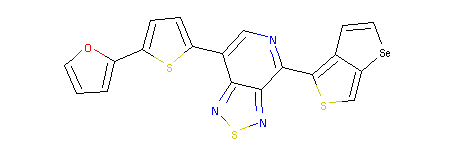

In [18]:
m = Chem.MolFromSmiles(df_piece.smiles[0])
m

In [19]:
chem_obj = df_piece.smiles.apply(lambda x:  Chem.MolFromSmiles(x))
chem_obj.shape

(10,)

In [20]:
Coords = chem_obj.apply(lambda x: Chem.AllChem.Compute2DCoords(x))
type(Coords)

pandas.core.series.Series

In [21]:
df_piece['Coords'] = Coords
df_piece

/Users/amy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,Coords
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
5,C1=Cc2cnc3cc4cc(-c5scc6[nH]ccc56)c5ccccc5c4cc3...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0
6,c1ncc(s1)-c1cnc2c(c1)oc1c2ccc2ccccc12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
7,c1sc(-c2ccc3c(c2)sc2c3c3=CCC=c3c3cccnc23)c2[se...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
8,c1ccc(o1)-c1cc2cc3cc4c5c[nH]cc5ccc4cc3cc2o1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0
9,[nH]1ccc2c3c[nH]cc3c3cc(-c4cncs4)c4=CCC=c4c3c12,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0


In [22]:
df_all_reindexed_1 = pd.DataFrame.copy(df_all_reindexed)

In [23]:
#read SMILE
#Do not run that again!! 25 mins
df_chem_obj = df_all_reindexed.smiles.apply(lambda x:  Chem.MolFromSmiles(x))

In [24]:
df_chem_obj

0          <rdkit.Chem.rdchem.Mol object at 0x13b490e50>
1          <rdkit.Chem.rdchem.Mol object at 0x13b490910>
2          <rdkit.Chem.rdchem.Mol object at 0x13b490fa0>
3          <rdkit.Chem.rdchem.Mol object at 0x13b490ec0>
4          <rdkit.Chem.rdchem.Mol object at 0x13b490de0>
5          <rdkit.Chem.rdchem.Mol object at 0x13b490f30>
6          <rdkit.Chem.rdchem.Mol object at 0x17ee26050>
7          <rdkit.Chem.rdchem.Mol object at 0x17ee260c0>
8          <rdkit.Chem.rdchem.Mol object at 0x17ee26130>
9          <rdkit.Chem.rdchem.Mol object at 0x17ee261a0>
10         <rdkit.Chem.rdchem.Mol object at 0x17ee26210>
11         <rdkit.Chem.rdchem.Mol object at 0x17ee26280>
12         <rdkit.Chem.rdchem.Mol object at 0x17ee262f0>
13         <rdkit.Chem.rdchem.Mol object at 0x17ee26360>
14         <rdkit.Chem.rdchem.Mol object at 0x17ee263d0>
15         <rdkit.Chem.rdchem.Mol object at 0x17ee26440>
16         <rdkit.Chem.rdchem.Mol object at 0x17ee264b0>
17         <rdkit.Chem.rdchem.M

In [ ]:
###Compute feature 2DCoords
Coords = df_chem_obj.apply(lambda x: Chem.AllChem.Compute2DCoords(x))

In [ ]:
df_all_reindexed_1['Coords'] = Coords

In [107]:
# print(chem_obj[0].GetBonds()[].GetBondType())

AROMATIC


In [114]:
# single = 0
# double = 0
# aromatic = 0

# for i in range(0, len(chem_obj[4].GetBonds()) ):
#     bond_type = str(chem_obj[0].GetBonds()[10].GetBondType())
#     if(bond_type=="AROMATIC"):
#         print("aromatic")
#         aromatic+=1
#     elif(bond_type=="SINGLE"):
#         print("single")
#         single+=1
#     elif(bond_type=="DOUBLE"):
#         print("double")
#         double+=1
    

In [124]:
from rdkit.Chem import Descriptors
Descriptors.TPSA(chem_obj[5])

28.68

In [128]:
Descriptors.MolLogP(chem_obj[3])

0.31589999999999996

In [135]:
Descriptors.NumValenceElectrons(chem_obj[4])

136

In [141]:
Descriptors.NumRadicalElectrons(chem_obj[4])

0

In [150]:
Descriptors.MaxPartialCharge(chem_obj[7], force=False)

nan

In [ ]:
df_piece()

In [142]:
# smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
# smiles_len

In [10]:
# from sklearn.cross_validation import train_test_split
# df_train = df_train.drop(['smiles'], axis=1)
# x_train, x_test, y_train, y_test = train_test_split(df_train, Y_train, test_size=0.4, random_state=42)
# x_train = x_train.values
# x_test = x_test.values

In [9]:
#from sklearn import svm
#clf = svm.SVR(kernel='linear')
#clf.fit(x_train, y_train)
#clf.score(x_test, y_test)

In [10]:
#cross validation to find the best regulization parameter
# from sklearn.linear_model import Ridge as Ridge_Reg
# from sklearn.linear_model import Lasso as Lasso_Reg
# from sklearn.cross_validation import KFold
# L_score = []
# R_score = []
# kf = KFold(n = x_train.shape[0], n_folds=5)

# regularization = 10.**np.arange(-10, 10)
# for c in regularization:
#     lasso_score = []
#     ridge_score = []
#     lasso_reg = Lasso_Reg(alpha = c)
#     ridge_reg = Ridge_Reg(alpha = c)
#     for train_index, test_index in kf:
#         train_x, test_x = x_train[train_index], x_train[test_index]
#         train_y, test_y = y_train[train_index], y_train[test_index]
#         lasso_reg.fit(train_x, train_y)
#         ridge_reg.fit(train_x, train_y)
#         lasso_score.append(lasso_reg.score(test_x,test_y))
#         ridge_score.append(ridge_reg.score(test_x,test_y))
#     L_score.append(np.average(lasso_score))
#     R_score.append(np.average(ridge_score))

KeyboardInterrupt: 

In [ ]:
#print L_score
print "The max score happens at",regularization[L_score.index(max(L_score))],"with score of", max(L_score)
#print R_score
print "The max score happens at",regularization[R_score.index(max(R_score))],"with score of", max(R_score)

In [ ]:
df_train_0 = df_train.loc[:, (df_train != 0).any(axis=0)]

In [ ]:
df_train_0.shape[1]

## CUT

In [3]:
df_train = pd.read_csv("train_filtered.csv")
df_train.head()

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.98


In [4]:
df_test = pd.read_csv("test_filtered.csv")
df_test.head()

,Id,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,...,feat_199,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [5]:
Y_train = df_train.gap.values
df_train = df_train.drop(['smiles'], axis=1)
df_train = df_train.drop(['gap'], axis=1)
df_test = df_test.drop(['Id'], axis=1)
df_test = df_test.drop(['smiles'], axis=1)

In [8]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

In [10]:
# from sklearn import tree
# DT_score = []
# kf = KFold(n = len(x_train), n_folds=5)
# for c in range(1,100):
#     dt_score = []
#     clf = tree.DecisionTreeRegressor(max_depth=c)
#     for train_index, test_index in kf:
#         train_x, test_x = x_train[train_index], x_train[test_index]
#         train_y, test_y = y_train[train_index], y_train[test_index]
#         clf.fit(train_x, train_y)
#         dt_score.append(clf.score(test_x, test_y))
#     DT_score.append(np.average(dt_score))

In [11]:
clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, y_train)
dt_score = clf.score(x_test, y_test)
dt_score

0.55076239990415088

In [13]:
y_pred = clf.predict(x_test)

In [14]:
def RMSE(y, y_hat):
    result = np.sqrt((np.sum((y-y_hat)**2))/y.shape[0])
    return result

In [15]:
print "The RMSE score of decision tree is ", RMSE(y_test, y_pred)

The RMSE score of decision tree is  0.272994538006


## Now we try feature engineering
## Try TPSA

In [16]:
df_all_TPSA = pd.read_csv("all_TPSA.csv")
df_all_TPSA.head()

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,TPSA
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,51.81
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,25.78
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,41.57
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,28.93
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,103.62


In [18]:
df_all_TPSA = df_all_TPSA.drop(['smiles'], axis=1)
df_all_TPSA.head()

,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,feat_072,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,TPSA
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,51.81
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,25.78
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,41.57
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,28.93
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,103.62


In [21]:
df_train_TPSA = df_all_TPSA.loc[:999999,:]
df_test_TPSA = df_all_TPSA.loc[1000000:,:]
print df_train_TPSA.shape
print df_test_TPSA.shape

(1000000, 32)
(824230, 32)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(df_train_TPSA, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

In [25]:
clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, y_train)
dt_score = clf.score(x_test, y_test)
dt_score

0.60235496177128245

In [26]:
y_pred = clf.predict(x_test)
print "The RMSE score of decision tree is ", RMSE(y_test, y_pred)

The RMSE score of decision tree is  0.256840609888


## Try RadicalElectron(Actually Valence)

In [27]:
df_all_RE = pd.read_csv("all_RadicalElectron.csv")
df_all_RE.head()

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,RadicalElectron
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,130
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,118
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,128
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,128
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,136


In [28]:
df_all_RE = df_all_RE.drop(['smiles'], axis=1)
df_all_RE.head()

,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,feat_072,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,RadicalElectron
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,130
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,118
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,128
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,128
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,136


In [29]:
df_train_RE = df_all_RE.loc[:999999,:]
df_test_RE = df_all_RE.loc[1000000:,:]
print df_train_RE.shape
print df_test_RE.shape

(1000000, 32)
(824230, 32)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_train_RE, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, y_train)
dt_score = clf.score(x_test, y_test)
dt_score

0.77182692447949808

In [32]:
y_pred = clf.predict(x_test)
print "The RMSE score of decision tree is ", RMSE(y_test, y_pred)

The RMSE score of decision tree is  0.194557558094


## Try MaxPartialCharge

In [33]:
df_all_MPC = pd.read_csv("all_MaxPartialCharge.csv")
df_all_MPC.head()

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,MaxPartialCharge
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.082104
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.114135
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.153400
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.164583


In [34]:
df_all_MPC = df_all_MPC.drop(['smiles'], axis=1)
df_all_MPC.head()

,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,feat_072,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,MaxPartialCharge
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.082104
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.114135
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.153400
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.164583


In [35]:
df_train_MPC = df_all_MPC.loc[:999999,:]
df_test_MPC = df_all_MPC.loc[1000000:,:]
print df_train_MPC.shape
print df_test_MPC.shape

(1000000, 32)
(824230, 32)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_train_MPC, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, y_train)
dt_score = clf.score(x_test, y_test)
dt_score


0.69068840254244779

In [37]:
y_pred = clf.predict(x_test)
print "The RMSE score of decision tree is ", RMSE(y_test, y_pred)

The RMSE score of decision tree is  0.226523889806


## Try TPSA + Valence + MPC

In [42]:
df_all_threeFeature = pd.DataFrame.copy(df_all_TPSA)
df_all_threeFeature['Valence'] = df_all_RE['RadicalElectron']
df_all_threeFeature['MaxPartialCharge'] = df_all_MPC['MaxPartialCharge']
df_all_threeFeature.head()

,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,feat_072,...,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,TPSA,Valence,MaxPartialCharge
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,51.81,130,0.000000
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,25.78,118,0.082104
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,41.57,128,0.114135
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,28.93,128,0.153400
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,103.62,136,0.164583


In [44]:
df_train_threeFeature = df_all_threeFeature.loc[:999999,:]
df_test_threeFeature = df_all_threeFeature.loc[1000000:,:]
print df_train_threeFeature.shape
print df_test_threeFeature.shape

(1000000, 34)
(824230, 34)


In [45]:
x_train, x_test, y_train, y_test = train_test_split(df_train_threeFeature, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, y_train)
dt_score = clf.score(x_test, y_test)
dt_score

0.82234119522001636

In [46]:
y_pred = clf.predict(x_test)
print "The RMSE score of decision tree is ", RMSE(y_test, y_pred)

The RMSE score of decision tree is  0.17167587779


## Try MolLogP

In [47]:
df_all_MLP = pd.read_csv("all_MolLogP.csv")
df_all_MLP.head()

,smiles,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,MolLogP
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0135
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5631
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.5704
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.3159
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.7371


In [48]:
df_all_MLP = df_all_MLP.drop(['smiles'], axis=1)
df_all_MLP.head()

,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,feat_072,...,feat_200,feat_208,feat_218,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,MolLogP
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0135
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5631
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.5704
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.3159
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.7371


In [49]:
df_train_MLP = df_all_MLP.loc[:999999,:]
df_test_MLP = df_all_MLP.loc[1000000:,:]
print df_train_MLP.shape
print df_test_MLP.shape

(1000000, 32)
(824230, 32)


In [50]:
x_train, x_test, y_train, y_test = train_test_split(df_train_MLP, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, y_train)
dt_score = clf.score(x_test, y_test)
dt_score

0.79465471582039116

In [51]:
y_pred = clf.predict(x_test)
print "The RMSE score of decision tree is ", RMSE(y_test, y_pred)

The RMSE score of decision tree is  0.184568794405


## Try TPSA + Valence + MPC + MLP

In [52]:
df_all_fourFeature = pd.DataFrame.copy(df_all_threeFeature)
df_all_fourFeature['MolLogP'] = df_all_MLP['MolLogP']
df_all_fourFeature.head()

,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,feat_072,...,feat_225,feat_226,feat_243,feat_248,feat_251,feat_252,TPSA,Valence,MaxPartialCharge,MolLogP
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,51.81,130,0.000000,6.0135
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,25.78,118,0.082104,0.5631
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,41.57,128,0.114135,3.5704
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,28.93,128,0.153400,0.3159
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,103.62,136,0.164583,4.7371


In [53]:
df_train_fourFeature = df_all_fourFeature.loc[:999999,:]
df_test_fourFeature = df_all_fourFeature.loc[1000000:,:]
print df_train_fourFeature.shape
print df_test_fourFeature.shape

(1000000, 35)
(824230, 35)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(df_train_fourFeature, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, y_train)
dt_score = clf.score(x_test, y_test)
dt_score

0.82944489460968718

In [55]:
y_pred = clf.predict(x_test)
print "The RMSE score of decision tree is ", RMSE(y_test, y_pred)

The RMSE score of decision tree is  0.16820862885


## Generate prediction using +fourFeature model

In [56]:
x_train = df_train_fourFeature.values
x_test = df_test_fourFeature.values

In [57]:
clf = tree.DecisionTreeRegressor(max_depth=44)
clf.fit(x_train, Y_train)
y_pred = clf.predict(x_test)

In [58]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [59]:
write_to_file("AddFourFeatures.csv", y_pred)

## Cut

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
GB_score = []
kf = KFold(n = len(x_train), n_folds=5)
for c in range(1,10):
    print c
    gb_score = []
    est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
     max_depth= c, random_state=0, loss='ls')
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        est.fit(train_x, train_y)
        gb_score.append(est.score(test_x, test_y))
    GB_score.append(np.average(gb_score))
print "The max score happens at", GB_score.index(max(GB_score)), "with score of", max(GB_score)

1
2
3
4
5
6
7
8
9
The max score happens at 8 with score of 0.549782262164


In [21]:
est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
     max_depth= 2, random_state=0, loss='ls')
df_test = df_test.drop(['smiles'], axis=1)
est.fit(df_train, Y_train)
y_hat = est.predict(df_test)

In [22]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [23]:
write_to_file("sample1.csv", y_hat)

In [1]:
from rdkit import Chem

ImportError: No module named rdkit